(mind)=
# Transformation

*These trivial matters—diet, locality, climate, and one's mode of recreation, the whole casuistry of self-love—are inconceivably more important than, all that which has hitherto been held in high esteem!*       
-- [Why I am so clever](https://www.gutenberg.org/files/52190/52190-h/52190-h.htm), Ecce Homo 
 

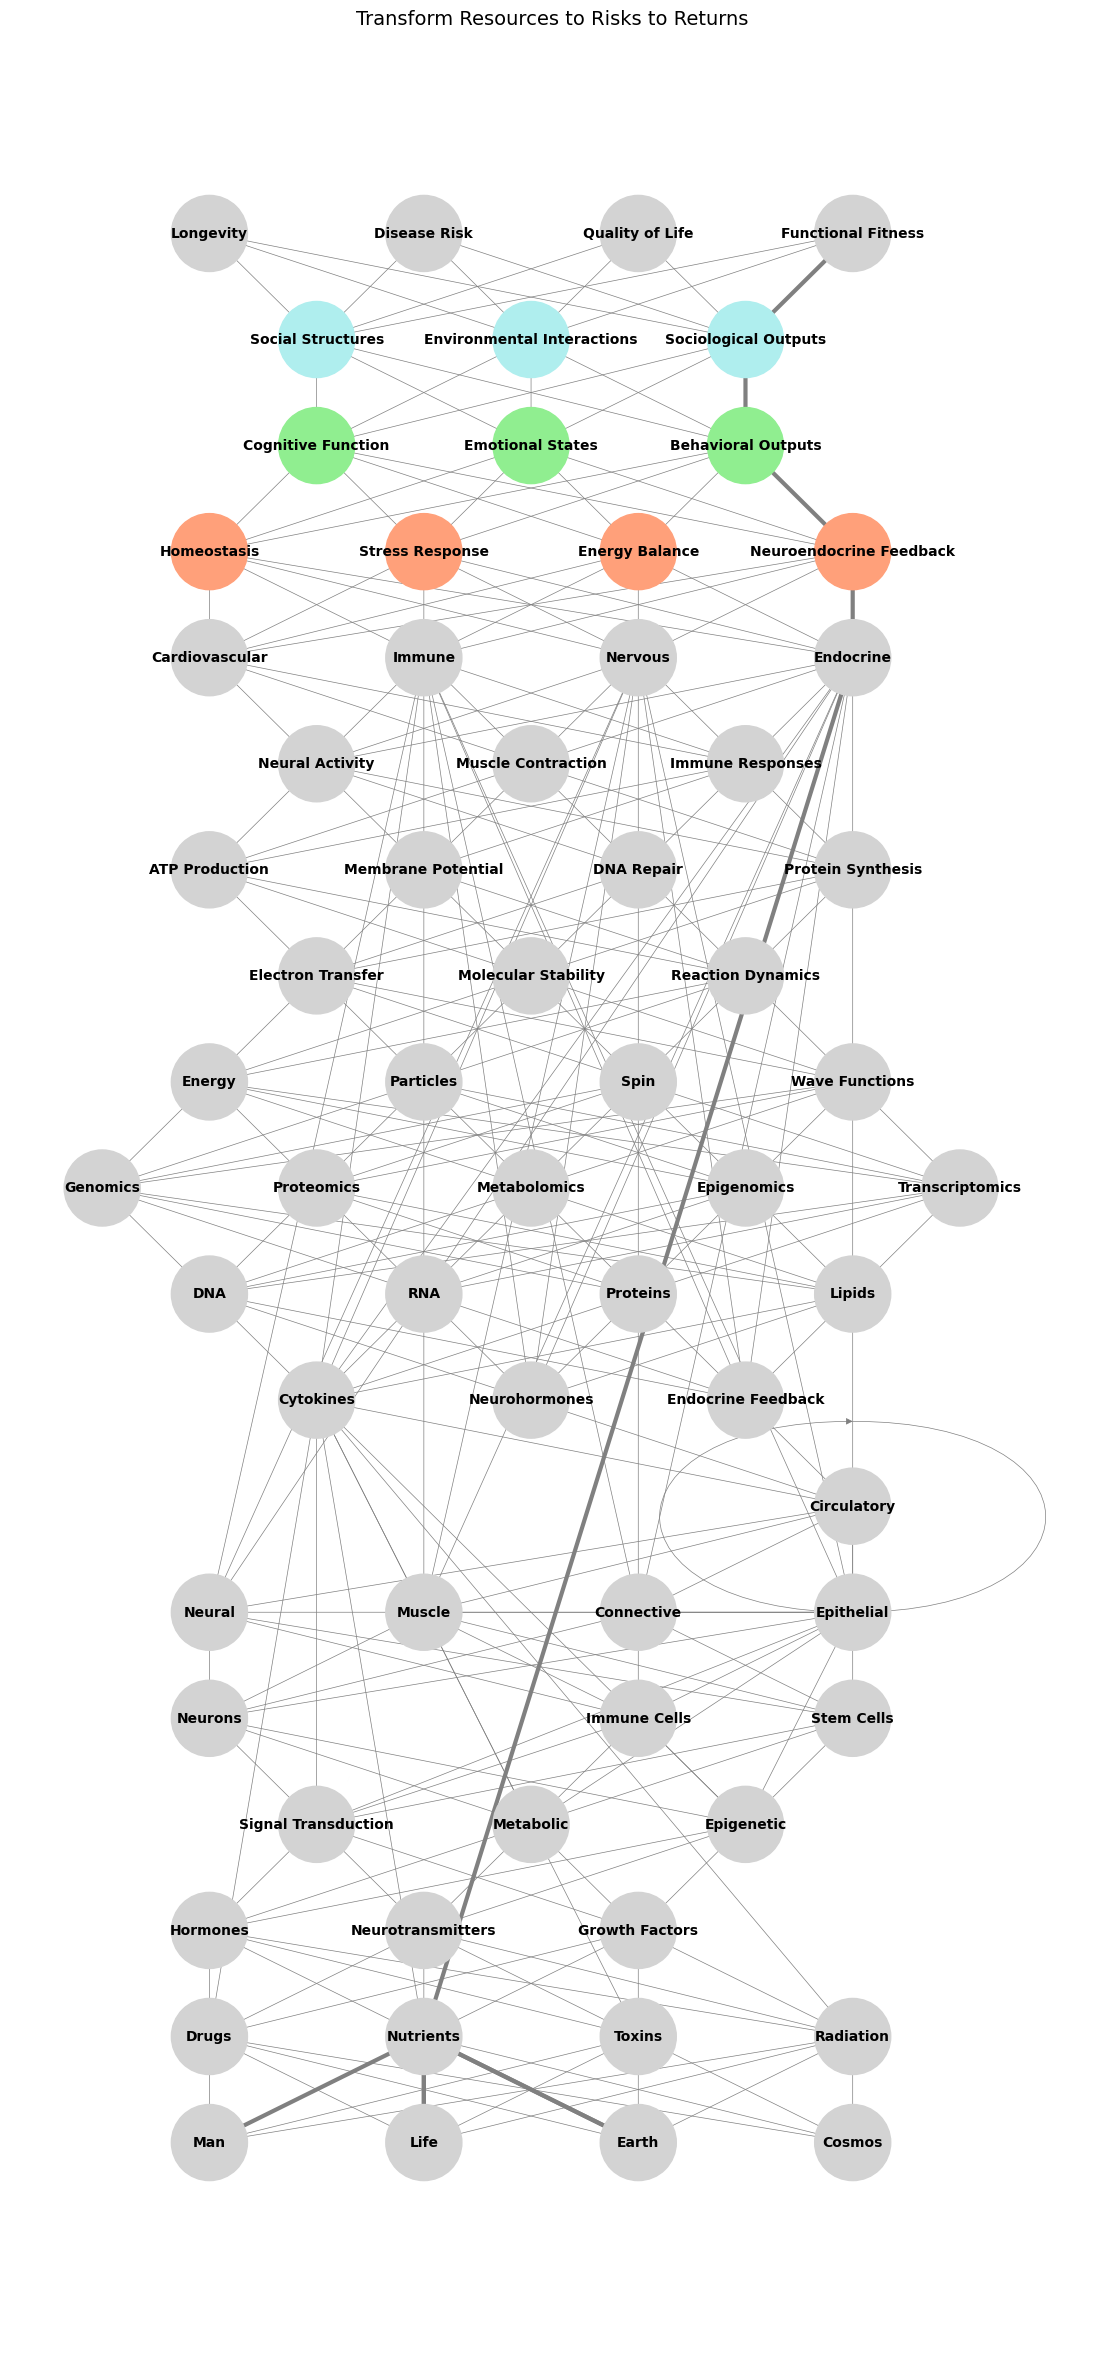

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Define layers for the input (compression) phase
input_layers = {
    "Biology": ['Man', 'Life', 'Earth', 'Cosmos'],
    "Drugs and External Factors": ['Drugs', 'Nutrients', 'Toxins', 'Radiation'],
    "Ligands & Receptors": ['Hormones', 'Neurotransmitters', 'Growth Factors', 'Cytokines'],
    "Pathways": ['Signal Transduction', 'Metabolic', 'Epigenetic'],
    "Cells": ['Neurons', 'Epithelial', 'Immune Cells', 'Stem Cells'],
    "Tissues": ['Neural', 'Muscle', 'Connective', 'Epithelial'],
    "Systems": ['Immune', 'Nervous', 'Endocrine', 'Circulatory'],
    "Immuno-Neuro-Endocrinology": ['Cytokines', 'Neurohormones', 'Endocrine Feedback'],
    "Molecular Biology": ['DNA', 'RNA', 'Proteins', 'Lipids'],
    "Omics": ['Genomics', 'Proteomics', 'Metabolomics', 'Epigenomics', 'Transcriptomics'],
    "Quantum": ['Energy', 'Particles', 'Spin', 'Wave Functions']
}

# Define layers for the output (decompression) phase
output_layers = {
    "Molecular Outputs": ['Electron Transfer', 'Molecular Stability', 'Reaction Dynamics'],
    "Cellular Behavior": ['ATP Production', 'Membrane Potential', 'DNA Repair', 'Protein Synthesis'],
    "Tissue-Level Dynamics": ['Neural Activity', 'Muscle Contraction', 'Immune Responses'],
    "Organ Systems": ['Cardiovascular', 'Immune', 'Nervous', 'Endocrine'],
    "Physiological States": ['Homeostasis', 'Stress Response', 'Energy Balance', 'Neuroendocrine Feedback'],
    "Behavioral and Psychological Outcomes": ['Cognitive Function', 'Emotional States', 'Behavioral Outputs'],
    "Sociological and Environmental Interactions": ['Social Structures', 'Environmental Interactions', 'Sociological Outputs'],
    "Functional Health Outcomes": ['Longevity', 'Disease Risk', 'Quality of Life', 'Functional Fitness']
}

# Merge input and output layers
full_layers = {**input_layers, **output_layers}

# Initialize the graph
G_full_biology = nx.DiGraph()

# Add nodes for each layer
for layer_name, nodes in full_layers.items():
    G_full_biology.add_nodes_from(nodes, layer=layer_name)

# Connect layers sequentially
layer_names = list(full_layers.keys())
for i in range(len(layer_names) - 1):
    source_layer = full_layers[layer_names[i]]
    target_layer = full_layers[layer_names[i + 1]]
    for source_node in source_layer:
        for target_node in target_layer:
            G_full_biology.add_edge(source_node, target_node)

# Define node positions for visualization (inverted layout)
pos_full_biology = {}
layer_spacing = 2  # Space between layers
node_spacing = 1.5  # Space between nodes within a layer

for i, (layer_name, nodes) in enumerate(full_layers.items()):
    y = i * layer_spacing - (len(layer_names) - 1) * layer_spacing / 2  # Inverted vertical alignment
    for j, node in enumerate(nodes):
        x = j * node_spacing - (len(nodes) - 1) * node_spacing / 2  # Center nodes horizontally within layer
        pos_full_biology[node] = (x, y)

# Define specific colors for the Stress Dynamics pathway
highlighted_layers = {
    "Physiological States": "lightsalmon",
    "Behavioral and Psychological Outcomes": "lightgreen",
    "Sociological and Environmental Interactions": "paleturquoise"
}

node_colors = []
for node in G_full_biology.nodes():
    for layer_name, color in highlighted_layers.items():
        if node in full_layers[layer_name]:
            node_colors.append(color)
            break
    else:
        node_colors.append("lightgray")

# Highlight the Stress Pathway
stress_path = [
    "Man", "Nutrients",  
    "Life", "Nutrients",  
    "Earth", "Nutrients",  
    "Endocrine", 
    "Neuroendocrine Feedback",
    "Behavioral Outputs",
    "Sociological Outputs",
    "Functional Fitness",
]

for i in range(len(stress_path) - 1):
    G_full_biology.add_edge(stress_path[i], stress_path[i + 1], weight=5)

edge_widths = []
for u, v in G_full_biology.edges():
    if (u, v) in zip(stress_path, stress_path[1:]):
        edge_widths.append(3)  # Highlighted path
    else:
        edge_widths.append(0.5)

# Draw the graph
plt.figure(figsize=(14, 30))
nx.draw_networkx_nodes(G_full_biology, pos_full_biology, node_size=3000, node_color=node_colors)
nx.draw_networkx_labels(G_full_biology, pos_full_biology, font_size=10, font_weight="bold")
nx.draw_networkx_edges(G_full_biology, pos_full_biology, width=edge_widths, edge_color="gray")
plt.title("Transform Resources to Risks to Returns", fontsize=14)
plt.axis('off')
plt.show()


```{figure} https://www.harleytherapy.co.uk/counselling/wp-content/uploads/freud-and-jung.jpg
---
width: 1%
height: 1%
---
_Biology, Sociology, Psychology_. The 19-layer neural network begins with an exhaustive input layer (1) spanning cosmic, earth, life, and man—raw, unfiltered, and Dionysian in its range and force. This chaotic energy is tempered by Apollonian floodgates (think: [Athena's Shield](https://upload.wikimedia.org/wikipedia/commons/4/49/%22The_School_of_Athens%22_by_Raffaello_Sanzio_da_Urbino.jpg)), channeling it into substrates that underpin human biology, represented by the majority of the network's structure (layers 2–15). Sequential compression begins at gate #1 (adversarial/biology at layer 16), progresses through gate #2 (iterative/sociology at layer 17), and culminates in gate #3 (cooperative/psychology at layer 18), reflecting the layered intricacy of Biology, Sociology, and Psychology. The cooperative equilibrium at this final compression is imperfect, requiring the individual to deftly navigate social structures, environmental interactions, and sociological outputs with firmness, tact, and clarity—traits embodied by the Oxford PPE education, a hallmark of Britain’s most successful 20th-century navigators. Finally, the output layer (19) represents the domain where payoffs are realized and continuously reappraised, capturing the `dynamic feedback` of lived experience.
```